# Exploration code for the data challenge
## Stefano Cosentino

In [1]:
import csv
import numpy as np
import pandas as pd

import pylab
from matplotlib import pyplot as plt
%matplotlib inline

# Import custom modules
from dataprep.parse_input import *



In [2]:
filename='/Users/joeDiHare/Documents/dataprep/dataprep/data/link.csv'
df = pd.read_csv(filename)
df.head()

# with open(filename, newline='') as csvfile:
#     subjID = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     for row in subjID:
#         print(', '.join(row))

# lstFilesDCM = []  # create an empty list
# for dirName, subdirList, fileList in os.walk(PathDicom):
#     for filename in fileList:
#         if filename.endswith('.dcm'):  # check whether the file's DICOM
#             lstFilesDCM.append(os.path.join(dirName, filename))


,patient_id,original_id
0,SCD0000101,SC-HF-I-1
1,SCD0000201,SC-HF-I-2
2,SCD0000301,SC-HF-I-4
3,SCD0000401,SC-HF-I-5
4,SCD0000501,SC-HF-I-6


In [3]:
filetxt='/Users/joeDiHare/Documents/dataprep/dataprep/data/contourfiles/'+df.original_id[0]+'/i-contours/IM-0001-0048-icontour-manual.txt'
with open(filetxt, newline='') as csvfile:
    subjID = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     for row in subjID:
#         print(', '.join(row))
filedicom = '/Users/joeDiHare/Documents/dataprep/dataprep/data/dicoms/'+df.patient_id[0]+'/48.dcm'
import dicom as dicom
# read the file
ds = dicom.read_file(filedicom)
# store the raw image data
dicom_img = ds.pixel_array

ConstPixelDims = (int(ds.Rows), int(ds.Columns), 1)

# Load spacing values (in mm)
ConstPixelSpacing = (float(ds.PixelSpacing[0]), float(ds.PixelSpacing[1]), float(ds.SliceThickness))

# calculate axes for this array
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(dicom_img))
plt.ylim([np.min(y), np.max(y)])
plt.xlim([np.min(x), np.max(x)])
# plt.plot(dicom_img)

In [5]:
coord = parse_contour_file(filetxt)
img, width, height = parse_dicom_file(filedicom)
poly_to_mask(coord, width, height)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [109]:
img

{'pixel_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)}

In [64]:
d = dict()
d2 = dict()
d['1'] = {'i_contour': [2,3,4,5],
           'o_contour': [2,3,4,5],
           'mask' : [2,3,4,5],
           'dicom': [2,3,4,5],
           'attributes': {
               'file_dicom': 'a',
                    },
         }
d['2'] = {'i_contour': [2,3,4,5],
           'o_contour': [2,3,4,5],
           'mask' : [2,3,4,5],
           'dicom': [2,3,4,5],
           'attributes': {
               'file_dicom': 'a',
                    },
         }

d2['ID'] = d



In [98]:
for key in ds:
    print(key)

(0008, 0000) Group Length                        UL: 676
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'CARDIAC', 'NONE']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.3391139613699913089
(0008, 0020) Study Date                          DA: '20120000'
(0008, 0021) Series Date                         DA: '20120000'
(0008, 0022) Acquisition Date                    DA: '20120000'
(0008, 0023) Content Date                        DA: '20120000'
(0008, 0030) Study Time                          TM: '083237.000000'
(0008, 0031) Series Time                         TM: '083859'
(0008, 0032) Acquisition Time                    TM: '084011.485317'
(0008, 0033) Content Time                        TM: '084020.319653'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality            

In [27]:
i_c = parse_contour_file('/Users/joeDiHare/Documents/dataprep/dataprep/data/contourfiles/'+df.original_id[0]+'/i-contours/IM-0001-0059-icontour-manual.txt')
o_c = parse_contour_file('/Users/joeDiHare/Documents/dataprep/dataprep/data/contourfiles/'+df.original_id[0]+'/o-contours/IM-0001-0059-ocontour-manual.txt')

130.5

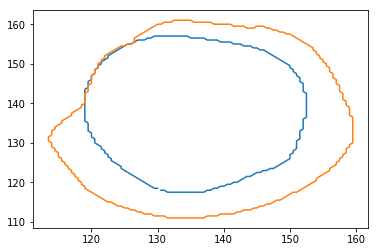

In [46]:
x, y , x2, y2 = [], [], [], []
for n in range(len(i_c)):
    x.append(i_c[n][0])
    y.append(i_c[n][1])
for n in range(len(o_c)):    
    x2.append(o_c[n][0])
    y2.append(o_c[n][1])    
plt.plot(x,y)
plt.plot(x2,y2)

In [57]:
s='IM-0001-0059-icontour-manual.txt'
s.split('-')[2].strip('0')

'59'